# <b>Project Name: Plant Disease Detection </b>

## Project Subtitle: Image Classification

### Project Date: July 5, 2025

# Table of Contents


**1. Business Understanding** 

**2. Data Understanding**

**3. Data Preprocessing**

**4. Model Development and Evaluation**
       
**5. Result Visualization and Insights**
      

# 1. Business Understanding

## 1.1. Problem Description

**`Problem Statement:`**

`In business term:`   Farmers often struggle to identify diseases in crops early, especially in tomatoes. Manual detection is slow and error-prone.

`In analytical term:`  This is a supervised image classification problem. We build a Convolutional Neural Network (CNN) that learns from labeled leaf images to automatically classify each sample into one of three classes: Healthy, Early Blight, or Late Blight. The model’s outputs will help to drive prioritized field alerts and treatment recommendations.



## 1.2. Project Objective

Build a Convolutional Neural Network (CNN) model to classify tomato leaf images into:

- Healthy
- Early Blight
- Late Blight

This can help automate early disease detection using image classification.

# 2. Data Understanding


## 2.1. Data Source

https://www.kaggle.com/datasets/emmarex/plantdisease



**`Dataset Description:`**

The PlantVillage Tomato subset is an image‐based dataset organized in a folder‐per‐class format.  Three folders for Healthy, Early Blight, Late Blight.


In [16]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

base_dir = 'datasets/plant_disease'  # Folder containing Tomato_healthy, Tomato_Early_blight, Tomato_Late_blight
classes = [d for d in os.listdir(base_dir) if d != '.DS_Store']
print("Classes:", classes)



Classes: ['Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Late_blight']


## 2.2. Exploratory Data Analysis

### 2.2.1. Text EDA : Descriptive Statistics

In [19]:
image_counts = {cls: len(os.listdir(os.path.join(base_dir, cls))) for cls in classes}
print("Image Counts:", image_counts)


Image Counts: {'Tomato_healthy': 1591, 'Tomato_Early_blight': 1000, 'Tomato_Late_blight': 1909}


### 2.2.2 Visual EDA : Data Visualizations

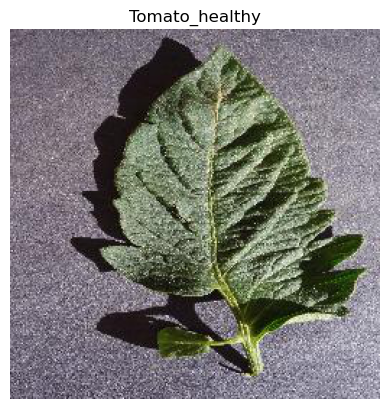

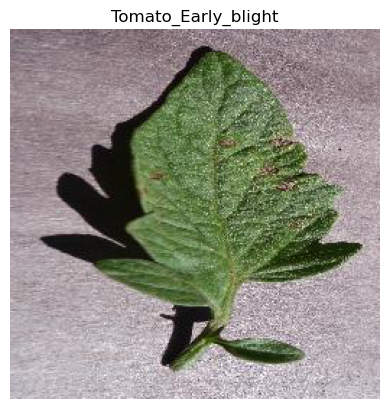

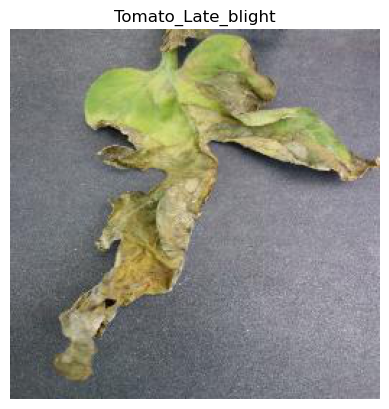

In [21]:
for cls in classes:
    folder = os.path.join(base_dir, cls)
    sample = os.listdir(folder)[0]
    img = Image.open(os.path.join(folder, sample))
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
    plt.show()


# 3. Data Pre-Processing


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
#!pip install tensorflow

In [25]:
img_size = (64, 64)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False               # ← important!
)

Found 3601 images belonging to 3 classes.
Found 899 images belonging to 3 classes.


In [26]:
print(train_gen.class_indices)


{'Tomato_Early_blight': 0, 'Tomato_Late_blight': 1, 'Tomato_healthy': 2}


# 4. Model Development


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input


In [29]:
# 1) Build the model
model = models.Sequential([
    Input(shape=(64, 64, 3)),                  # << add this
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

# 2) Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3) Define Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# 4) Train (make sure train_gen and val_gen are defined already)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5239 - loss: 0.9591
Epoch 1: val_accuracy improved from -inf to 0.80979, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.5248 - loss: 0.9577 - val_accuracy: 0.8098 - val_loss: 0.4525 - learning_rate: 0.0010
Epoch 2/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7898 - loss: 0.4585
Epoch 2: val_accuracy did not improve from 0.80979
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.7899 - loss: 0.4583 - val_accuracy: 0.7786 - val_loss: 0.5135 - learning_rate: 0.0010
Epoch 3/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8196 - loss: 0.4053
Epoch 3: val_accuracy improved from 0.80979 to 0.86986, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8196 - loss: 0.4049 - val_accuracy: 0.8699 - val_loss: 0.3145 - learning_rate: 0.0010
Epoch 4/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8421 - loss: 0.3616
Epoch 4: val_accuracy did not improve from 0.86986
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.8420 - loss: 0.3618 - val_accuracy: 0.8554 - val_loss: 0.3315 - learning_rate: 0.0010
Epoch 5/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8730 - loss: 0.3066
Epoch 5: val_accuracy improved from 0.86986 to 0.87875, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8729 - loss: 0.3068 - val_accuracy: 0.8788 - val_loss: 0.2651 - learning_rate: 0.0010
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8783 - loss: 0.3020
Epoch 6: val_accuracy did not improve from 0.87875
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.8782 - loss: 0.3022 - val_accuracy: 0.8721 - val_loss: 0.2789 - learning_rate: 0.0010
Epoch 7/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8687 - loss: 0.2999
Epoch 7: val_accuracy improved from 0.87875 to 0.89655, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.8687 - loss: 0.3001 - val_accuracy: 0.8966 - val_loss: 0.2615 - learning_rate: 0.0010
Epoch 8/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8782 - loss: 0.2943
Epoch 8: val_accuracy did not improve from 0.89655
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.8782 - loss: 0.2942 - val_accuracy: 0.8476 - val_loss: 0.3350 - learning_rate: 0.0010
Epoch 9/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8920 - loss: 0.2677
Epoch 9: val_accuracy improved from 0.89655 to 0.89878, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8920 - loss: 0.2674 - val_accuracy: 0.8988 - val_loss: 0.2259 - learning_rate: 0.0010
Epoch 10/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8949 - loss: 0.2476
Epoch 10: val_accuracy did not improve from 0.89878
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.8950 - loss: 0.2475 - val_accuracy: 0.8988 - val_loss: 0.2190 - learning_rate: 0.0010
Epoch 11/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9017 - loss: 0.2429
Epoch 11: val_accuracy improved from 0.89878 to 0.92436, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9017 - loss: 0.2429 - val_accuracy: 0.9244 - val_loss: 0.1781 - learning_rate: 0.0010
Epoch 12/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8979 - loss: 0.2380
Epoch 12: val_accuracy did not improve from 0.92436
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8980 - loss: 0.2380 - val_accuracy: 0.9055 - val_loss: 0.2273 - learning_rate: 0.0010
Epoch 13/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8990 - loss: 0.2573
Epoch 13: val_accuracy did not improve from 0.92436
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.8990 - loss: 0.2572 - val_accuracy: 0.9077 - val_loss: 0.1997 - learning_rate: 0.0010
Epoch 14/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9305 - loss: 0.1887
Epoch 14: val_accuracy improved from 0.92436 to 0.92992, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9304 - loss: 0.1887 - val_accuracy: 0.9299 - val_loss: 0.1693 - learning_rate: 0.0010
Epoch 15/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9229 - loss: 0.1861
Epoch 15: val_accuracy did not improve from 0.92992
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9228 - loss: 0.1863 - val_accuracy: 0.9255 - val_loss: 0.1794 - learning_rate: 0.0010
Epoch 16/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9096 - loss: 0.2064
Epoch 16: val_accuracy improved from 0.92992 to 0.93326, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9096 - loss: 0.2066 - val_accuracy: 0.9333 - val_loss: 0.1599 - learning_rate: 0.0010
Epoch 17/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9405 - loss: 0.1552
Epoch 17: val_accuracy did not improve from 0.93326
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9403 - loss: 0.1554 - val_accuracy: 0.9210 - val_loss: 0.2007 - learning_rate: 0.0010
Epoch 18/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9282 - loss: 0.1838
Epoch 18: val_accuracy did not improve from 0.93326
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.9284 - loss: 0.1835 - val_accuracy: 0.9333 - val_loss: 0.1590 - learning_rate: 0.0010
Epoch 19/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9340 - loss: 0.1672
Epoch 19: val_accuracy improved from 0.93326 to 0.93771, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9340 - loss: 0.1673 - val_accuracy: 0.9377 - val_loss: 0.1586 - learning_rate: 0.0010
Epoch 20/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9483 - loss: 0.1505
Epoch 20: val_accuracy did not improve from 0.93771
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.9484 - loss: 0.1503 - val_accuracy: 0.9277 - val_loss: 0.1795 - learning_rate: 0.0010
Epoch 21/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9429 - loss: 0.1555
Epoch 21: val_accuracy did not improve from 0.93771
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9429 - loss: 0.1555 - val_accuracy: 0.9333 - val_loss: 0.1476 - learning_rate: 0.0010
Epoch 22/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9370 - loss: 0.1551
Epoch 22: val_accuracy did not improve from 0.93771
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9370 - loss: 0.1550 - val_accuracy: 0.9377 - val_loss: 0.1380 - learning_rate: 0.0010
Epoch 23/30


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9492 - loss: 0.1293 - val_accuracy: 0.9466 - val_loss: 0.1370 - learning_rate: 0.0010
Epoch 24/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9545 - loss: 0.1396
Epoch 24: val_accuracy improved from 0.94661 to 0.95439, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9545 - loss: 0.1394 - val_accuracy: 0.9544 - val_loss: 0.1373 - learning_rate: 0.0010
Epoch 25/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9488 - loss: 0.1330
Epoch 25: val_accuracy improved from 0.95439 to 0.95884, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9489 - loss: 0.1328 - val_accuracy: 0.9588 - val_loss: 0.1092 - learning_rate: 0.0010
Epoch 26/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9501 - loss: 0.1206
Epoch 26: val_accuracy did not improve from 0.95884
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9500 - loss: 0.1208 - val_accuracy: 0.9499 - val_loss: 0.1114 - learning_rate: 0.0010
Epoch 27/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9610 - loss: 0.1058
Epoch 27: val_accuracy did not improve from 0.95884
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9608 - loss: 0.1064 - val_accuracy: 0.9499 - val_loss: 0.1315 - learning_rate: 0.0010
Epoch 28/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9489 - loss: 0.1283
Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 28: val_accuracy did not improve from 0.95884
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9489 - loss: 0.1283 

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9667 - loss: 0.0934 - val_accuracy: 0.9778 - val_loss: 0.0677 - learning_rate: 5.0000e-04
Epoch 30/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9658 - loss: 0.0894
Epoch 30: val_accuracy did not improve from 0.97775
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9658 - loss: 0.0895 - val_accuracy: 0.9733 - val_loss: 0.0828 - learning_rate: 5.0000e-04


In [30]:
# 4.4 Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
[[179  21   0]
 [ 13 367   1]
 [  0   1 317]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       200
           1       0.94      0.96      0.95       381
           2       1.00      1.00      1.00       318

    accuracy                           0.96       899
   macro avg       0.96      0.95      0.95       899
weighted avg       0.96      0.96      0.96       899



# 5. Result Visualization and Insights


## 5.1 Accuracy and Loss Curves

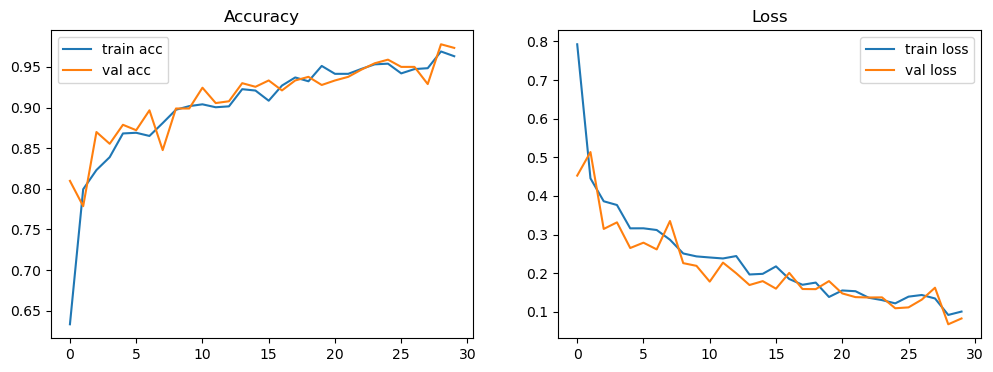

In [33]:
# 5.1 Accuracy and Loss Curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       200
           1       0.98      0.96      0.97       381
           2       1.00      1.00      1.00       318

    accuracy                           0.98       899
   macro avg       0.97      0.98      0.97       899
weighted avg       0.98      0.98      0.98       899



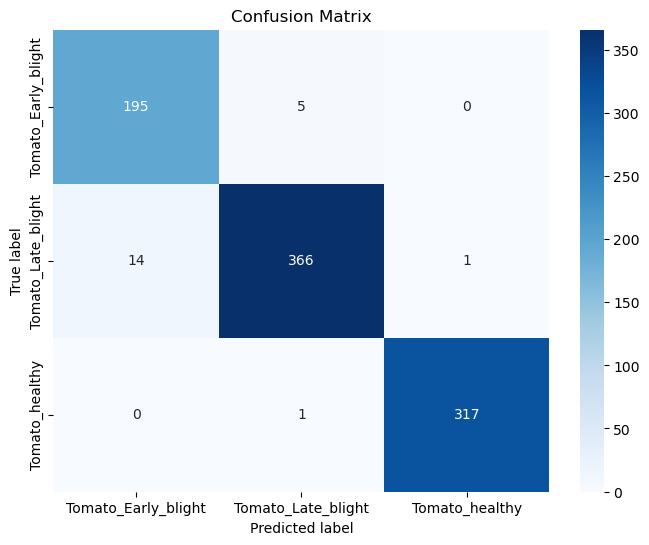

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Compute CM
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

# 2. Print reports
print("Classification report:\n", classification_report(y_true, y_pred_classes))

# 3. Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, 
            annot=True, fmt='d', 
            xticklabels=list(val_gen.class_indices.keys()),
            yticklabels=list(val_gen.class_indices.keys()),
            cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
